In [27]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from research.weight_estimation.keypoint_utils.keypoint_transformations import get_keypoint_arr

In [2]:
df = pd.read_csv('/root/data/s3/aquabyte-images-adhoc/alok/production_datasets/imr_data_one_month.csv')
df1 = pd.read_csv('/root/data/temp/results_current_pytorch_imr.csv')
df2 = pd.read_csv('/root/data/temp/results_new_biomass_keras_model_imr_v2.csv')


In [3]:
raw_keypoint_arrs, centered_keypoint_arrs = [], []
for idx, row in df.iterrows():
    raw_keypoint_arr, centered_keypoint_arr = get_keypoint_arr(json.loads(row.annotation), json.loads(row.camera_metadata))
    raw_keypoint_arrs.append(raw_keypoint_arr)
    centered_keypoint_arrs.append(centered_keypoint_arr)



In [4]:
df['raw_keypoint_arr'] = raw_keypoint_arrs
df['centered_keypoint_arr'] = centered_keypoint_arrs

In [5]:
raw_depths = []
centered_depths = []
for idx, row in df.iterrows():
    raw_keypoint_arr, centered_keypoint_arr = row.raw_keypoint_arr, row.centered_keypoint_arr
    raw_median_depth = np.median(raw_keypoint_arr[:, 1])
    centered_median_depth = np.median(centered_keypoint_arr[:, 1])
    raw_depths.append(raw_median_depth)
    centered_depths.append(centered_median_depth)
    
df['raw_depth'] = raw_depths
df['centered_depth'] = centered_depths
df['difference'] = df2.estimated_weight_g - df1.estimated_weight_g

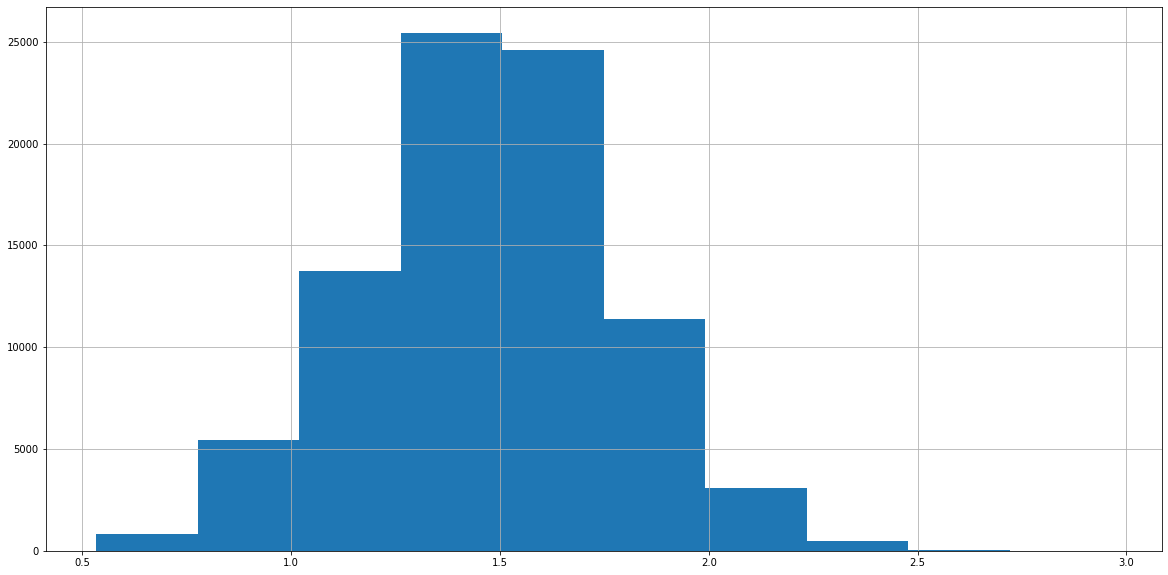

In [8]:
plt.figure(figsize=(20, 10))
plt.hist(df.raw_depth)
plt.grid()
plt.show()

In [26]:
vals = np.arange(0.5, 3.0, 0.1)
for idx in range(len(vals) - 1):
    low, high = vals[idx], vals[idx+1]
    mean_diff = df[(df.centered_depth > low) & (df.centered_depth < high)].difference.mean()
    print('Mean Difference for depth range {}<->{}: {}'.format(round(low, 1), round(high, 1), mean_diff))

Mean Difference for depth range 0.5<->0.6: -156.8863747848405
Mean Difference for depth range 0.6<->0.7: -55.687194211142405
Mean Difference for depth range 0.7<->0.8: 5.7035999225197775
Mean Difference for depth range 0.8<->0.9: 100.9191073472373
Mean Difference for depth range 0.9<->1.0: 126.1182270161762
Mean Difference for depth range 1.0<->1.1: 145.07522375564352
Mean Difference for depth range 1.1<->1.2: 146.87192062626178
Mean Difference for depth range 1.2<->1.3: 153.14759443402377
Mean Difference for depth range 1.3<->1.4: 168.67354928220368
Mean Difference for depth range 1.4<->1.5: 176.61896303522568
Mean Difference for depth range 1.5<->1.6: 199.06358010638942
Mean Difference for depth range 1.6<->1.7: 231.35963202930265
Mean Difference for depth range 1.7<->1.8: 280.59884597925014
Mean Difference for depth range 1.8<->1.9: 341.2949479507764
Mean Difference for depth range 1.9<->2.0: 424.35334129489894
Mean Difference for depth range 2.0<->2.1: 500.11551019280375
Mean Diffe

In [17]:
json.loads(df[df.right_crop_url == 'https://aquabyte-crops.s3.eu-west-1.amazonaws.com/environment=production/site-id=40/pen-id=61/date=2019-11-23/hour=00/at=2019-11-23T00:31:20.795673000Z/right_frame_crop_1050_24_3358_837.jpg'].annotation.iloc[0])

{'id': 4205,
 'leftCrop': [{'xCrop': 245,
   'yCrop': 479,
   'xFrame': 1647,
   'yFrame': 479,
   'keypointType': 'TAIL_NOTCH'},
  {'xCrop': 510,
   'yCrop': 334,
   'xFrame': 1912,
   'yFrame': 334,
   'keypointType': 'ADIPOSE_FIN'},
  {'xCrop': 2135,
   'yCrop': 255,
   'xFrame': 3537,
   'yFrame': 255,
   'keypointType': 'UPPER_LIP'},
  {'xCrop': 699,
   'yCrop': 610,
   'xFrame': 2101,
   'yFrame': 610,
   'keypointType': 'ANAL_FIN'},
  {'xCrop': 1077,
   'yCrop': 623,
   'xFrame': 2479,
   'yFrame': 623,
   'keypointType': 'PELVIC_FIN'},
  {'xCrop': 1946,
   'yCrop': 295,
   'xFrame': 3348,
   'yFrame': 295,
   'keypointType': 'EYE'},
  {'xCrop': 1682,
   'yCrop': 479,
   'xFrame': 3084,
   'yFrame': 479,
   'keypointType': 'PECTORAL_FIN'},
  {'xCrop': 1190,
   'yCrop': 137,
   'xFrame': 2592,
   'yFrame': 137,
   'keypointType': 'DORSAL_FIN'}],
 'rightCrop': [{'xCrop': 275,
   'yCrop': 487,
   'xFrame': 1298,
   'yFrame': 487,
   'keypointType': 'TAIL_NOTCH'},
  {'xCrop': 532,
 